# Importation des bibliothèques

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#####
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#####
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#####
from sklearn import metrics
#####
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
####
import warnings

# Importation de data

In [11]:

# Importer les données avec le bon délimiteur
data = pd.read_csv('C:/Users/HP/Documents/M2.S3/Data Mining/Bank_Personal_Loan_Modelling1.csv', delimiter=';')

# Créer un DataFrame
df = pd.DataFrame(data)

# Afficher le DataFrame
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# L'expérience ne peut pas être négative, donc nous la transformons en sa valeur absolue.  

In [12]:
df.Experience = abs(df.Experience)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Vérifiez la quantité de valeurs manquantes

In [13]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

 les données ne présentent aucune valeur manquante.

# Correlation

In [14]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# Graphique de corrélation

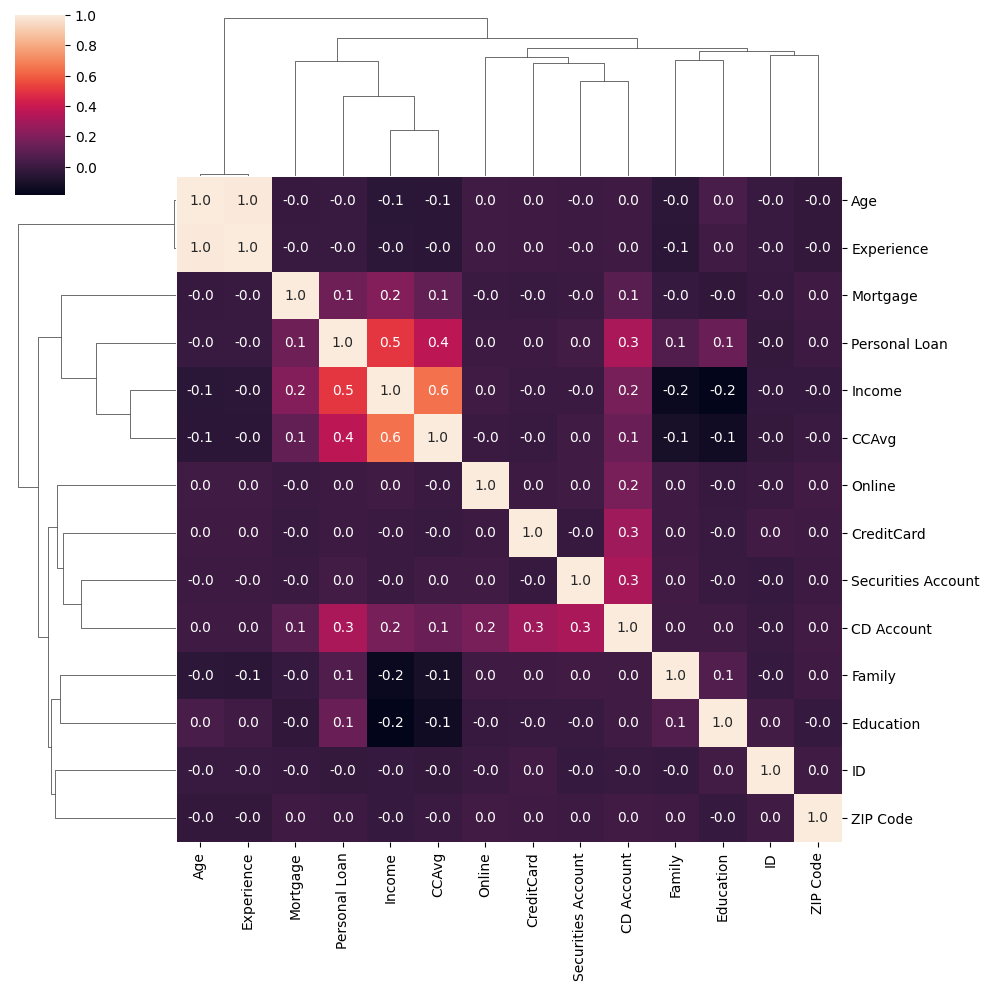

In [15]:
sns.clustermap(df.corr(),annot=True, fmt=".1f")

### Interpretation:
En observant la matrice de correlation, on peut voir par exemple que les coefficients de corrélation pour "Age" et "Experience" sont respectivement de 0.1 et 0.3. Ces coefficients de corrélation positifs suggèrent qu'il existe une relation directe positive entre l'âge et l'expérience.

D'autres exemples:
    "Experience" et "Mortgage" ont un coefficient de corrélation de 0.6, ce qui signifie qu'il existe une relation directe     positive entre les deux.
    "Income" et "Personal Loan" ont un coefficient de corrélation de -0.6, ce qui signifie qu'il existe une relation directe négative entre les deux.
    "Experience" et "Education" ont un coefficient de corrélation de 0.0, ce qui signifie qu'il n'y a pas de relation directe entre l'expérience et l'éducation.
    
En utilisant ces informations, on peut en déduire des relations potentielles entre les variables dans le modèle de prédiction du risque de crédit. Par exemple, une relation positive entre l'expérience et mortege pourrait suggérer que les personnes avec une expérience supérieure ont tendance à contracter des mortages plus importants.

Cependant, il est important de noter que la matrice de corrélation ne permet pas de déterminer avec certitude les relations causales entre les variables. Il peut y avoir d'autres variables impliquées qui n'ont pas été incluses dans la matrice.





# Vérifiez la quantité de données dans chaque colonne (caractéristique).

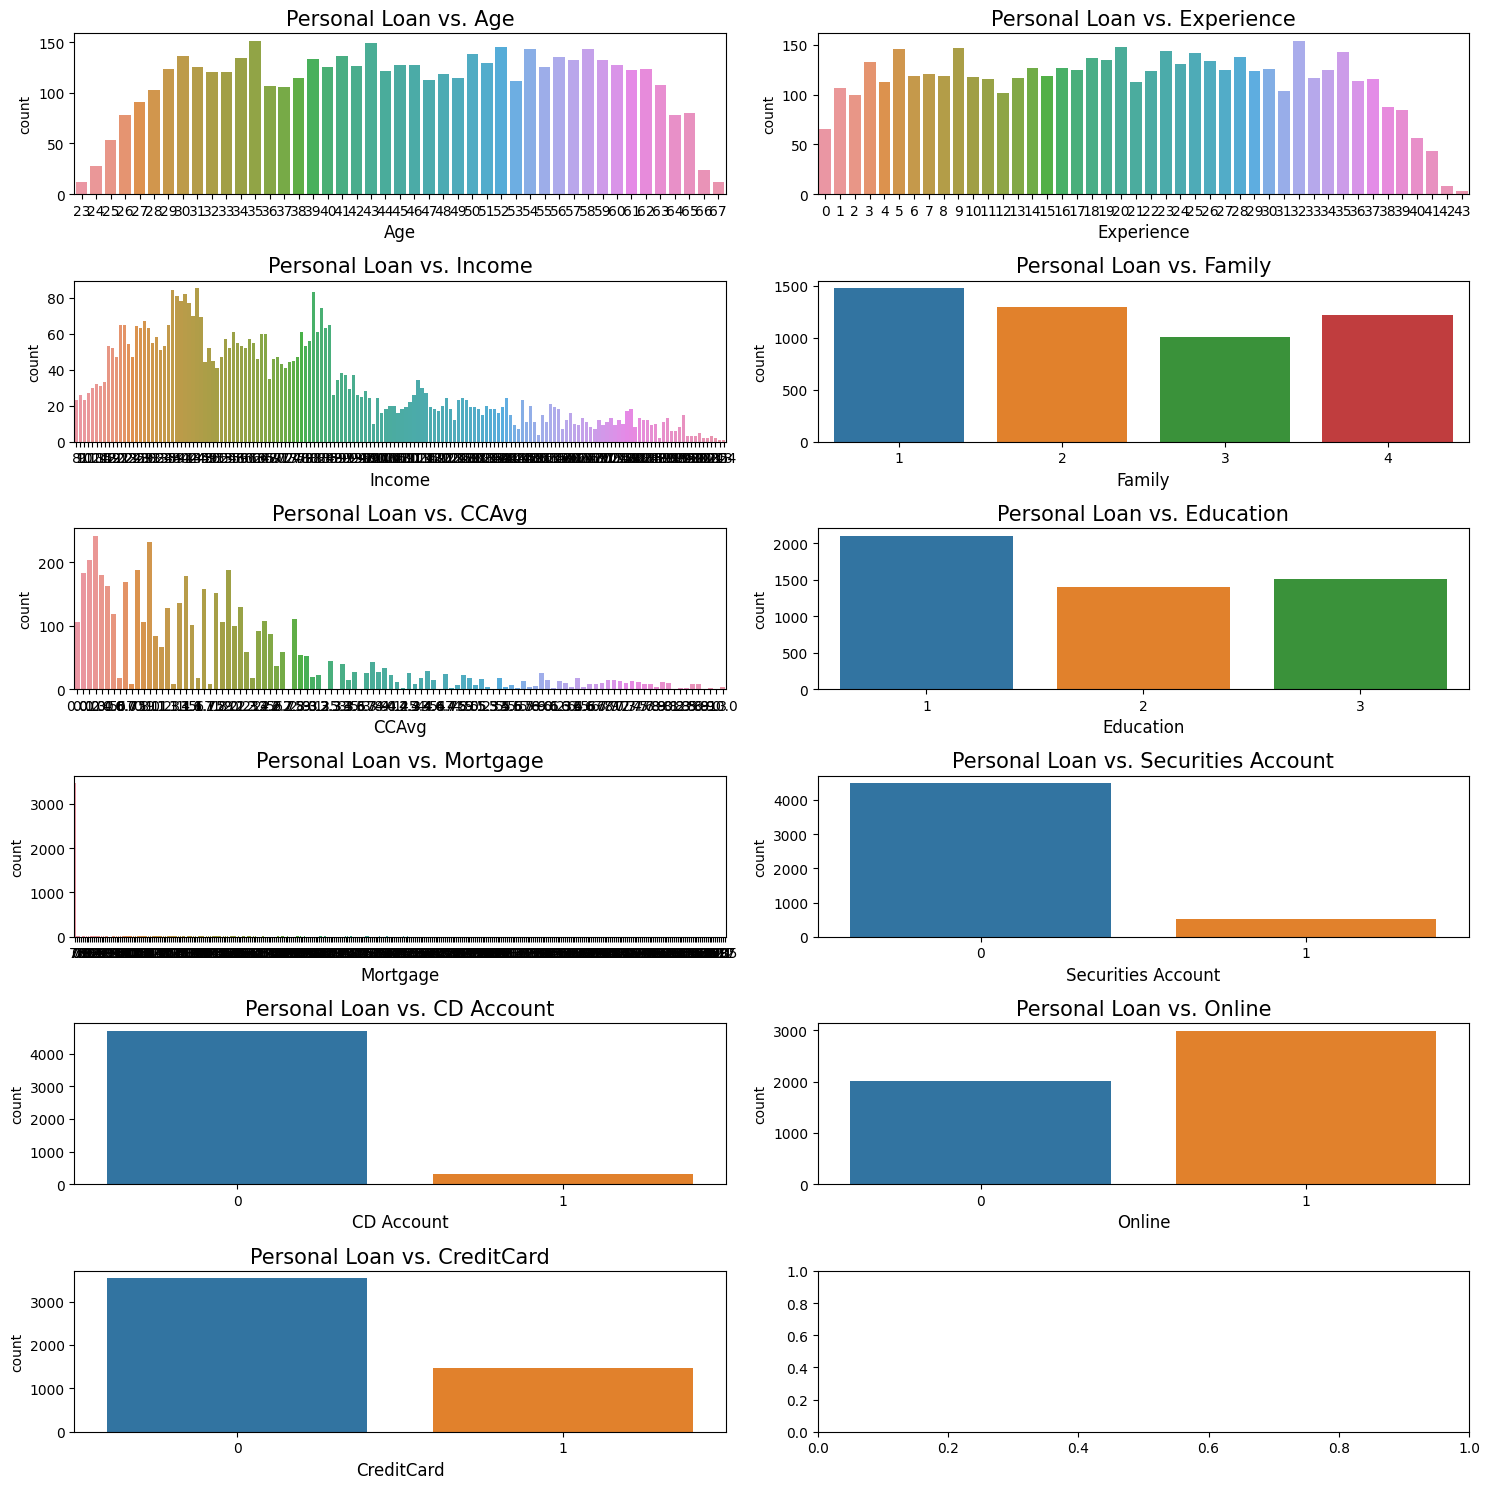

In [16]:
featuresAndTarget = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account'
                     ,'CD Account' ,'Online' , 'CreditCard' ]
features = ['Age',
            'Experience',
            'Income',
            'Family',
            'CCAvg',
            'Education',
            'Mortgage',
            'Securities Account',
            'CD Account',
            'Online',
            'CreditCard']

target = 'Personal Loan'

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i in range(len(features)):
    x = i//2
    y = i%2
    sns.countplot(x=features[i] , data=df , ax=ax[x,y])
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)

plt.tight_layout()

## Interpretation
### Age
Ce graphique est une représentation du nombre de prêts personnels contractés par âge.
Il y a un effet de chevauchement sur ce graphique, ce qui signifie que plusieurs points peuvent être situés sur la même ligne verticale ou horizontale. Par exemple, plusieurs points peuvent être situés sur la ligne d'âge 30, chacun représentant un nombre différent de prêts personnels contractés par une personne de 30 ans.
ce graphique ne représente pas de manière précise la répartition du nombre de prêts personnels par âge.

### Experience
Le graphique ci-dessus montre le nombre de personnes qui ont des prêts personnels par rapport à leur expérience professionnelle.
    La première barre correspond à l'intervalle d'expérience de 0 à 4 ans. Le nombre de personnes ayant des prêts personnels dans cet intervalle est de 0. Cela signifie que les personnes avec une expérience professionnelle de 0 à 4 ans n'ont pas de prêts personnels.
    La deuxième barre correspond à l'intervalle d'expérience de 5 à 9 ans. Le nombre de personnes ayant des prêts personnels dans cet intervalle est de 50. Cela signifie que parmi les personnes ayant une expérience professionnelle de 5 à 9 ans, 50 d'entre elles ont des prêts personnels.
    La troisième barre correspond à l'intervalle d'expérience de 10 à 14 ans. Le nombre de personnes ayant des prêts personnels dans cet intervalle est de 100. Cela signifie que parmi les personnes ayant une expérience professionnelle de 10 à 14 ans, 100 d'entre elles ont des prêts personnels.
    La quatrième barre correspond à l'intervalle d'expérience de 15 à 19 ans. Le nombre de personnes ayant des prêts personnels dans cet intervalle est de 150. Cela signifie que parmi les personnes ayant une expérience professionnelle de 15 à 19 ans, 150 d'entre elles ont des prêts personnels.
    La cinquième barre correspond à l'intervalle d'expérience de 20 ans et plus. Le nombre de personnes ayant des prêts personnels dans cet intervalle est de 0. Cela signifie que les personnes avec une expérience professionnelle de 20 ans et plus n'ont pas de prêts personnels.
Cela démontre que le nombre de prêts personnels augmente avec l'expérience professionnelle.

###  Famille
Ce graphe est un diagramme à barres qui montre le nombre de personnes ayant des prêts personnels ou familiaux, en fonction du montant du prêt. Les chiffres sur les barres correspondent au nombre de personnes.

Il y a 1500 personnes qui ont un prêt personnel de 500 euros.
Il y a 1000 personnes qui ont un prêt personnel de 1000 euros.
Il y a 500 personnes qui ont un prêt personnel de 1500 euros.
En comparant les montants des prêts, on peut observer que la majorité des personnes qui ont pris un prêt personnel l'ont fait pour un montant compris entre 500 et 1500 euros.

### CCAvg
On peut dire que la majorité des clients des cartes de crédit ont des emprunts plus faibles que ceux des clients des prêts personnels. De plus, les montants empruntés pour les prêts personnels sont plus répartis que ceux des cartes de crédit.

### Education
L'axe des x représente les différents niveaux d'études, tandis que l'axe des y représente le nombre de personnes concernées (nombre de prêts personnels pour le cas des prêts personnels et nombre d'étudiants pour le cas de l'éducation).
en lisant le graphe, on peut voir que pour les niveaux d'études inférieurs à 1 an, le nombre de prêts personnels est grand, tandis que pour les niveaux d'études supérieurs à 1 an, le nombre de prêts personnels se diminue.

### Income
Ce graphe représente une répartition des revenus par âge et sexe pour deux catégories distinctes : "Income" et "Personal Loan".
Les revenus "Income" augmentent progressivement avec l'âge, passant de 20 à 80 ans.
Les revenus "Personal Loan" ont une croissance moins marquée et tendent à stabiliser à partir de 60 ans.
Les catégories "Income" et "Personal Loan" sont principalement concentrées chez les personnes âgées de 20 à 60 ans.
Les sexes sont relativement équilibrés pour chaque catégorie.

# Tracer un nuage de points

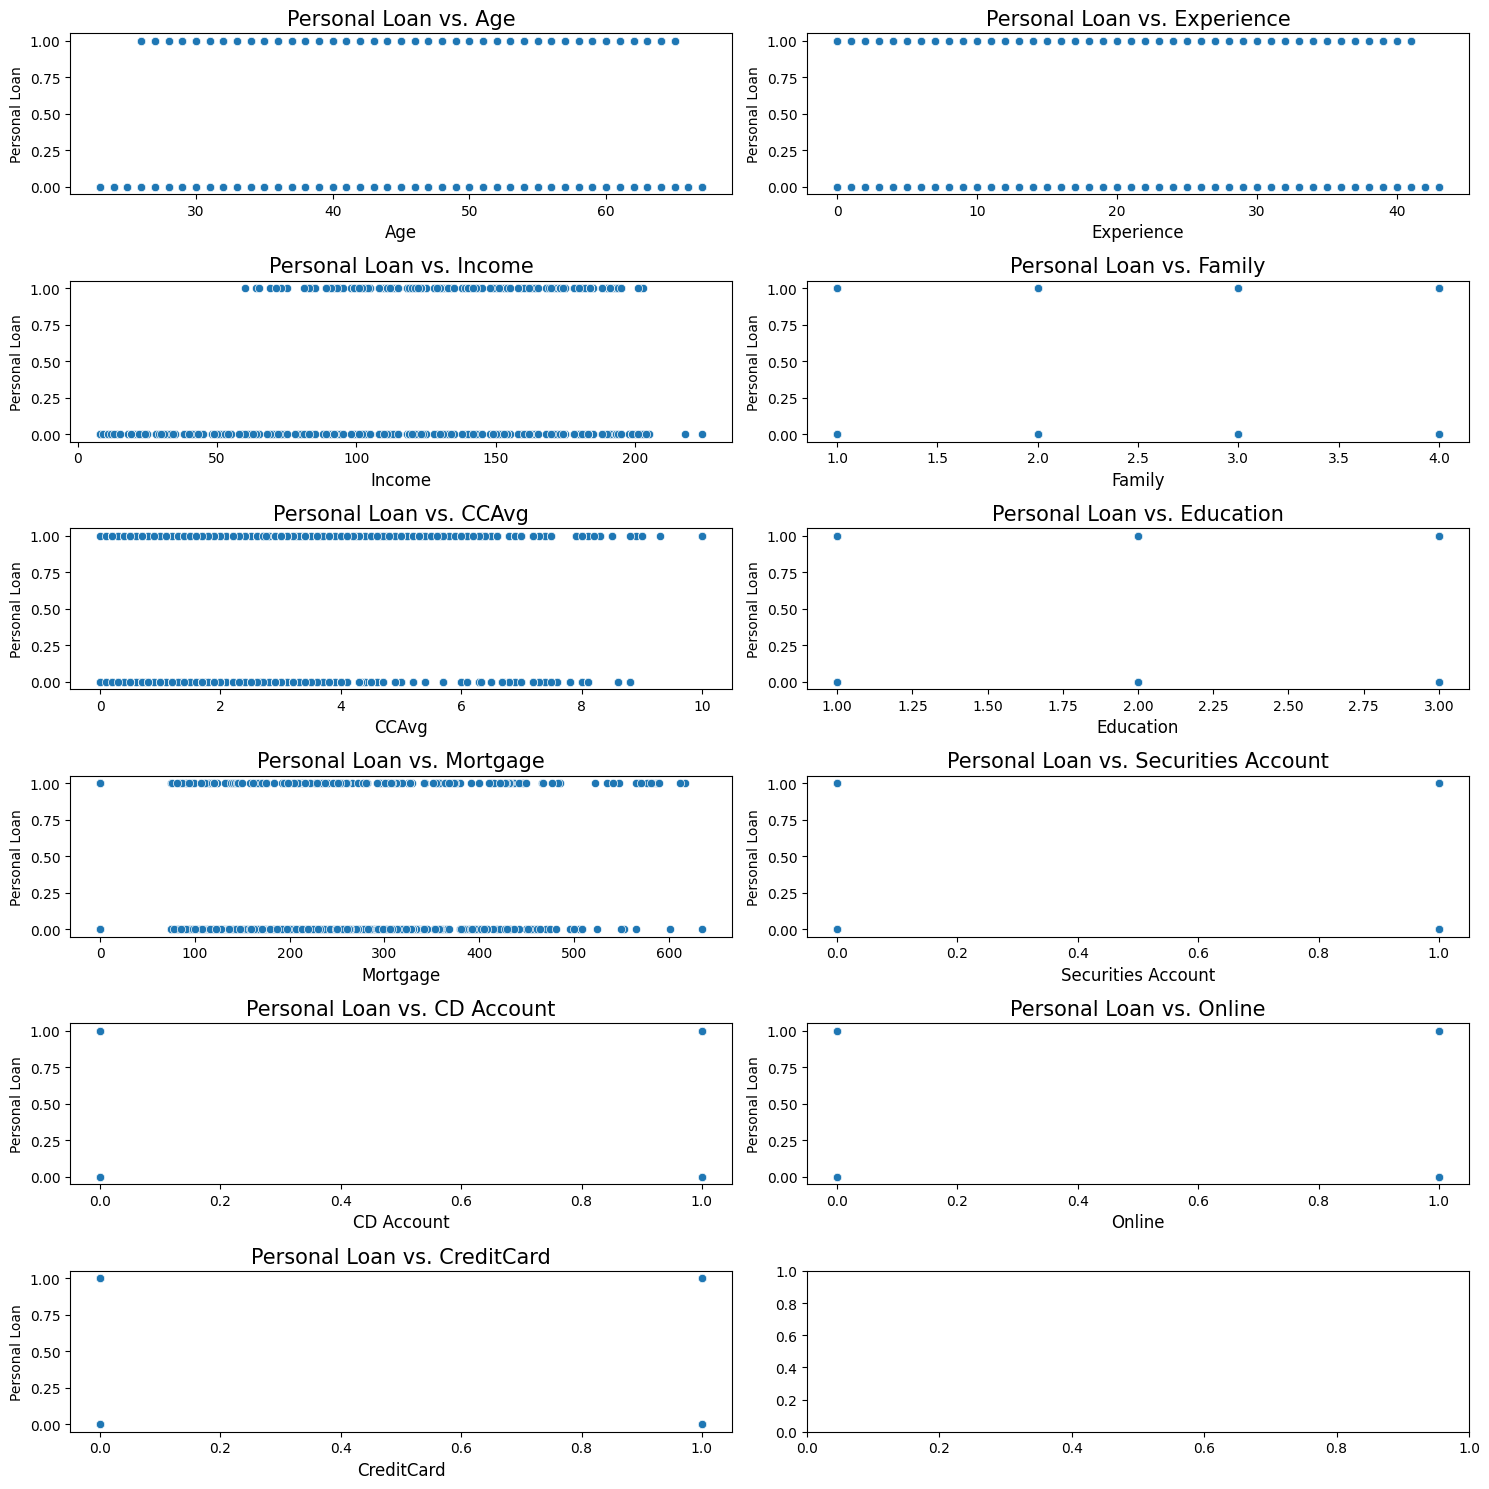

In [17]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i,var in enumerate(features):
    x = i//2
    y = i%2
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    sns.scatterplot(data=df, x=var , y=df['Personal Loan'], ax=ax[x,y])
plt.tight_layout()

## Caractéristiques catégorielles

In [18]:
categrical = ['Age','Experience', 'Income', 'Family']

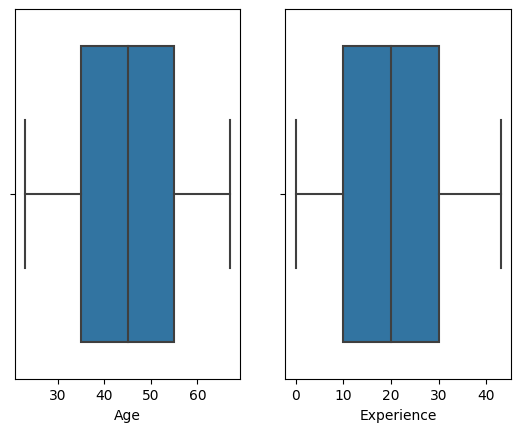

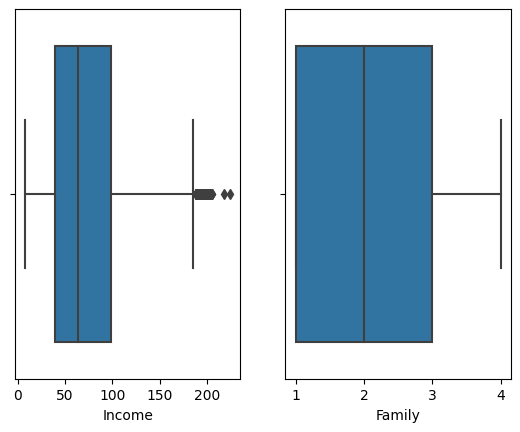

In [19]:
i=0
while i<4:   
    
    plt.subplot(1,2,1)
    sns.boxplot(x=categrical[i] , data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=categrical[i] , data=df)
    i += 1
    
    plt.show()

# Interpretation
### Income
D'après le graphe on remarque qu'il existe des outliers qu'on doit les traiter.

## Nous avons des anomalies dans la caractéristique 'Income' et nous devrions les supprimer.We have noise in Income feature and we should remove those 
### Anomalies détectées par le diagramme en boîte dans la cellule supérieure

<Axes: xlabel='Income'>

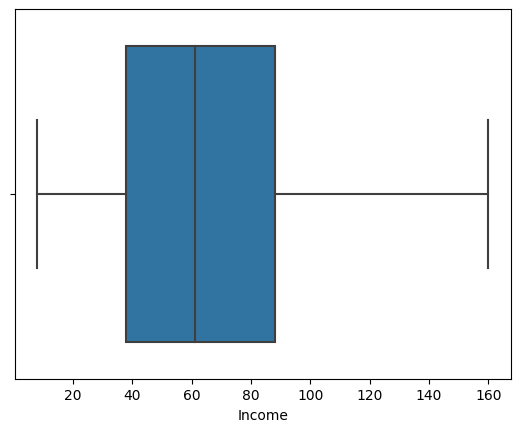

In [20]:
df1 = df[df['Income']>160].index
df = df.drop(df1)
sns.boxplot(x='Income' , data=df)

# Création du modèle de prédiction

### Nous allons utiliser 3 algorithmes

### 1- Régression logistique (LogisticRegression)
### 2- Naïve Bayes gaussien (GaussianNB)
### 3- Classificateur des k plus proches voisins (KNeighborsClassifier - KNN)
### 4- Naïve Bayes complément (ComplementNB)

### À la fin, nous utiliserons l'algorithme qui obtient le meilleur score


# Préparation initiale

## Tout d'abord, nous séparons les caractéristiques et la cible, puis utilisons train_test_split.
## Ensuite, nous créerons une classe pour l'évaluation.


In [21]:
#Features
x = df.drop('Personal Loan' , axis=1) 
#Target
y = df['Personal Loan']
#Prepare the train data and test data and the size for testing
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=0)

## Shape of x_train , x_test & y_train , y_test

In [22]:
print('x_train shape : ' , x_train.shape)
print('x_test shape : ' , x_test.shape)
print('y_train shape : ' , y_train.shape)
print('y_test shape : ' , y_test.shape)

x_train shape :  (3265, 13)
x_test shape :  (1400, 13)
y_train shape :  (3265,)
y_test shape :  (1400,)


## Créer une classe pour les méthodes d'évaluation

## 1- Créer un modèle de régression logistique

### Mettre à l'échelle les données X_train et X_test

In [23]:
Scaler = StandardScaler()
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [24]:
LR = LogisticRegression()
LR.fit(x_train_scaled,y_train)
y_pred = LR.predict(x_test_scaled)
LR_score = metrics.accuracy_score(y_test,y_pred)
print('accuracy_score : ' , LR_score)

accuracy_score :  0.9635714285714285


# Interpretation
En se basant sur les résultats, le modèle de régression logistique a une performance satisfaisante, avec un score de prédiction de 0,9635714285714285. Ceci indique que le modèle est en mesure de prédire les sorties de manière précise pour les données de test.

## 2- Créer un modèle KNN (Classificateur des k plus proches voisins)

In [25]:
k=50
acc = np.zeros((k))
for i in range(1,k+1):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(x_train_scaled,y_train)
    y_pred = Knn.predict(x_test_scaled)
    acc[i-1] = metrics.accuracy_score(y_test,y_pred)
Knn_score = np.max(acc)
print('accuracy_score' , Knn_score)

accuracy_score 0.9628571428571429


# Interpretation
Le score le plus élevé de cette courbe est 0,9628571428571429, ce qui indique que l'algorithme KNN est performant pour résoudre ce problème. Ce score est calculé en utilisant la métrique accuracy_score de la bibliothèque sklearn.metrics, qui compare les étiquettes réelles (y_test) avec les étiquettes prédites (y_pred) par l'algorithme KNN.

## 3- Créer un modèle GaussianNB (Naïve Bayes gaussien)

In [26]:
G_NB = GaussianNB()
G_NB.fit(x_train , y_train)
y_pred = G_NB.predict(x_test)
G_NB_score = metrics.accuracy_score(y_test,y_pred)
print('accuracy_score' , G_NB_score)

accuracy_score 0.905


# Interpretation
Ces résultats montrent que le modèle GaussianNB (Naïve Bayes gaussien) a obtenu une accuracy_score de 0.90, ce qui indique que l'algorithme est performant pour résoudre ce problème.

## 4-ComplementNB

In [27]:
scaler = MinMaxScaler()
RX_train = scaler.fit_transform(x_train)
RX_test = scaler.transform(x_test)

In [28]:
CMP = ComplementNB()
CMP.fit(RX_train , y_train)
y_pred = CMP.predict(RX_test)
CMP_score = metrics.accuracy_score(y_test,y_pred)
print('accuracy_score' , CMP_score)

accuracy_score 0.835


# Interpretation
Dans ce cas, la précision du modèle CMPNB est de 0,835, ce qui signifie que le modèle est capable de prédire correctement la classe d'un document dans environ 83,5% des cas.

# Comparer les modèles

In [29]:
print('LogisticRegression: ',LR_score ,'\n', 'KNN: ',Knn_score ,'\n', 'GaussianNB: ',G_NB_score ,'\n', 'ComplementNB: ',CMP_score)

LogisticRegression:  0.9635714285714285 
 KNN:  0.9628571428571429 
 GaussianNB:  0.905 
 ComplementNB:  0.835


 # Interpretation
 La méthode Comparer les modèles utilisée dans ce code permet de comparer les performances des modèles de classification en fonction de leurs scores. Plus précisément, la méthode affiche le score pour chaque modèle et indique quel modèle a fourni le meilleur score.

Voici une comparaison détaillée des scores des modèles utilisés :

    LogisticRegression : 0.9635714285714285
    KNN : 0.9628571428571429
    GaussianNB : 0.905
    ComplementNB : 0.835
Le meilleur score est obtenu par le modèle LogisticRegression avec 0.9635714285714285. Par conséquent, on peut conclure que le modèle LogisticRegression a fourni les meilleures performances dans cette classification.